# **FICO Analytic Challenge © Fair Isaac 2024**

# Week 5 - Logistic Regression - Model training and evaluation

## Logistic Regression

Logistic regression is a Machine Learning algorithm used primarily for binary classification problems, where the outcome can take one of two possible values. The goal is to predict the probability that the outcome belongs to a given class or not based on information from predictor variables.

Few examples of binary classification problems -
1. Spam Detection: To predict if an email is spam or not spam
2. Medical Diagnosis: To predict if a tumor is malignant or not
3. Marketing: To predict if a customer will buy a product or not
4. **Credit Scoring**: To predict if a customer will default on a loan or not
5. **Fraud Detection**: To identify if a transaction is fraud or not



<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-05-11-51-17.png width = "800" style="margin:50px 0px 50px 0px">

<img src = https://www.saedsayad.com/images/LogReg_1.png width = "1000" style="margin:50px 0px 50px 0px">

**Sigmoid function:** The S-shaped curve used to predict probabilities. It's value is always between 0 and 1. <br>
<img src = https://editor.analyticsvidhya.com/uploads/642295.png style="margin:0px 50px 20px 250px">

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-05-10-58-02.png width = "800" style="margin:50px 0px 50px 0px">

**Resources:**

https://www.kdnuggets.com/2020/03/linear-logistic-regression-explained.html

https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

https://www.analyticsvidhya.com/blog/2021/10/building-an-end-to-end-logistic-regression-model/

## Contents

**1. Load Dataset**

**2. Modelling Data Preparation**

    2.1 Summary Statistics
    2.2 Missing value analysis
    2.3 Normalization of the features
    2.4 Dataset filtering
    2.5 Create train and test datasets
    
**3. Model Training**

    3.1 Training Logistic Regression Model
    3.2 Forward Selection of features
    3.3 Backward Elimination of features

## 1. Load Dataset

1. Load the train and test datasets
2. Create a new column 'is_train' to use it as a tag to identify train and test datasets
3. Combine the train and test datasets for further analysis

In [1]:
! pip install mlxtend

In [2]:
! pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump, load

pd.set_option('display.max_columns', None)   # displays all columns
pd.set_option('display.max_rows', None)    # displays all rows

In [4]:
# Setting up the Google Drive mount
from google.colab import drive
drive.mount('/content/drive')

import os
import sys

path = '/content/drive/MyDrive/FICO Analytic Challenge/'
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/FICO Analytic Challenge


In [5]:
# Location of the data
data = 'Data'

# Location to save model
model_folder = 'Model'

# # Names of the datasets
# train_dataset_name = "train_features.csv"
# test_dataset_name = "test_A_features.csv"

# Name of the model
model = 'LogReg'

# dataset file prefix
trainFile = ['train']
testFile = ['test_A']
# testFile = ['test_B']
# testFile = ['test_C_notags']

# CSV filename and where features dataset will be saved
featureTrainFileSuffix="_advanced_features.csv"
featureTestFileSuffix="_advanced_features.csv"

filePathTrain=os.path.join(path + data, trainFile[0] + featureTrainFileSuffix)
filePathTest=os.path.join(path + data, testFile[0] + featureTestFileSuffix)

if not os.path.isfile(filePathTrain):
    featureTrainFileSuffix="_features.csv"
    filePathTrain=os.path.join(path + data, trainFile[0] + featureTrainFileSuffix)

if not os.path.isfile(filePathTest):
    featureTestFileSuffix="_features.csv"
    filePathTest=os.path.join(path + data, testFile[0] + featureTestFileSuffix)

# CSV filename and where outputs will be saved
trainsaveCSV = os.path.join(path + data, 'score.' + model + '.' + trainFile[0] + featureTrainFileSuffix)
testsaveCSV = os.path.join(path + data, 'score.' + model + '.' + testFile[0] + featureTestFileSuffix)

print("Path to Train Output file and filename: {}".format(trainsaveCSV))
print("Path to Test Output file and filename: {}".format(testsaveCSV))

Path to Train Output file and filename: /content/drive/MyDrive/FICO Analytic Challenge/Data/score.LogReg.train_advanced_features.csv
Path to Test Output file and filename: /content/drive/MyDrive/FICO Analytic Challenge/Data/score.LogReg.test_A_advanced_features.csv


In [6]:
def import_df(filename):
    df1 = pd.read_csv(filename)
    df1['transactionDateTime'] = pd.to_datetime(df1['transactionDateTime'])
    df1 = df1.sort_values(by=['pan','transactionDateTime'])
    return df1

In [7]:
# Read the train dataset, print the dimensions (#rows x #columns) of the dataset and view the first 5 rows
df_train_features = import_df(filePathTrain)
# df_train_features = pd.read_csv(os.path.join(path, data, train_dataset_name))
print(df_train_features.shape)
df_train_features.head()

(953235, 67)


,pan,merchant,category,transactionAmount,first,last,mdlIsFraudTrx,mdlIsFraudAcct,is_train,cardholderCountry,cardholderState,transactionDateTime,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,merchCountry,merchState,deltaTime,1m,AvgTransactionAmount_Last7Days,CNP_High,HighValue_International,IS_0_TO_5AM,IsHighValue,IsSpent,IsTransaction,Is_High_Low,RelativeAmount,amount_diff,amt_trend_24h,amt_trend_5e,average_spending,category_ratio,count_trend_1h,ewm_1D,high_interaction,is_cnp,is_grocery_pos,is_international,is_late_night,is_travel,monday_buy,num_hi_amt_last_hour,num_last_24_hours,outside_country,outside_state_purchase,ratio_14D_to_60D,ratio_30D_to_60D,repeat_amt,repeat_hi_amt_1H,rolling_mean_14D,rolling_mean_30D,rolling_mean_60D,spending_above_threshold,spending_below_avg_20,transactionHour,transactionHour_Risk,user_avg_amount
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:12:25,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,362febb0060ce2d6a995a72a116e34f4,1350565945,40.289849,-92.676330,US,Missouri,0.0,35.830000,35.8300,0,0,0,0,1,0,-1,0.000000,0.00,35.8300,0.00,66.400815,0.0,1.0,35.83000,0,1,0,0,0,False,0,0.0,1.0,0,1,1.0,1.0,0,35.830000,35.8300,35.8300,35.8300,0,1,17,0,NaN
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:47:30,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,de7d5f0356d41470cd02e719e2e0b196,1350568050,40.699982,-91.713680,US,Iowa,2105.0,1.890000,18.8600,0,0,0,0,1,0,-1,0.052749,-33.94,18.8600,0.00,66.400815,0.0,2.0,18.86000,0,0,0,0,0,False,0,0.0,2.0,0,0,1.0,1.0,0,1.890000,18.8600,18.8600,18.8600,0,1,17,0,35.8300
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:59:01,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,c9d194a3266cd20b23478dd8d2361ef9,1350529141,40.295853,-92.779702,US,Missouri,691.0,18.529834,18.7500,0,0,0,0,1,0,-1,0.982503,16.64,18.7500,0.00,66.400815,0.0,3.0,18.69500,1,1,0,0,0,False,0,0.0,3.0,0,1,1.0,1.0,0,18.530000,18.7500,18.7500,18.7500,0,1,17,0,18.8600
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 18:05:38,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,e860a23fcbb2d46956a6f4f7b18cfe3f,1353168338,40.535509,-91.770945,US,Missouri,397.0,90.144187,36.6225,0,0,0,0,1,1,-1,4.812800,71.71,36.6225,0.00,66.400815,0.0,4.0,54.46750,1,0,0,0,0,False,0,0.0,4.0,0,1,1.0,1.0,0,90.240000,36.6225,36.6225,36.6225,1,0,18,0,18.7500
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 18:08:36,F,043 Hanson Turnpike,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,d3db2da4a5c741058ff57f61023e5353,1353168516,41.245006,-92.860950,US,Iowa,178.0,153.589793,60.6700,0,0,0,1,1,1,-1,4.283159,66.62,60.6700,60.67,66.400815,0.0,5.0,105.66375,1,0,0,0,0,False,0,1.0,5.0,0,0,1.0,1.0,0,124.373329,60.6700,60.6700,60.6700,1,0,18,0,36.6225


In [8]:
# Read the test dataset, print the dimensions (#rows x #columns) of the dataset and view the first 5 rows
df_test_features = import_df(filePathTest)
# df_test_features = pd.read_csv(os.path.join(path, data, test_dataset_name))
print(df_test_features.shape)
df_test_features.head()

(505267, 67)


,pan,merchant,category,transactionAmount,first,last,mdlIsFraudTrx,mdlIsFraudAcct,is_train,cardholderCountry,cardholderState,transactionDateTime,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,merchCountry,merchState,deltaTime,1m,AvgTransactionAmount_Last7Days,CNP_High,HighValue_International,IS_0_TO_5AM,IsHighValue,IsSpent,IsTransaction,Is_High_Low,RelativeAmount,amount_diff,amt_trend_24h,amt_trend_5e,average_spending,category_ratio,count_trend_1h,ewm_1D,high_interaction,is_cnp,is_grocery_pos,is_international,is_late_night,is_travel,monday_buy,num_hi_amt_last_hour,num_last_24_hours,outside_country,outside_state_purchase,ratio_14D_to_60D,ratio_30D_to_60D,repeat_amt,repeat_hi_amt_1H,rolling_mean_14D,rolling_mean_30D,rolling_mean_60D,spending_above_threshold,spending_below_avg_20,transactionHour,transactionHour_Risk,user_avg_amount
0,0150904986626304B,Skiles LLC,home,36.50,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 17:57:01,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,db6a0a1b9e86c282da6a4bc57104f1a1,1382133421,41.953278,-89.323863,US,Illinois,0.0,36.500000,36.500000,0,0,0,0,1,0,-1,0.069650,0.00,36.500000,0.000,57.243325,0.00,1.0,36.500000,1,0,0,0,0,False,0,0.0,1.0,0,1,1.0,1.0,0,36.50,36.500000,36.500000,36.500000,0,1,17,0,524.050000
1,0150904986626304B,Gutmann Ltd,grocery_net,76.51,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 17:58:19,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,2e893c8e5e97f1831b9900bb2a9e5245,1382072299,41.818884,-87.525811,US,Illinois,78.0,67.941258,56.505000,0,0,0,0,1,1,-1,2.096164,40.01,56.505000,0.000,57.243325,0.00,2.0,56.505000,1,1,0,0,0,False,0,0.0,2.0,0,1,1.0,1.0,0,76.51,56.505000,56.505000,56.505000,1,0,17,0,36.500000
2,0150904986626304B,Terry Ltd,home,45.53,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 18:29:29,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,1491abd68110bccb8c9c532f3ad551ab,1384694969,43.692286,-87.538847,US,Wisconsin,1870.0,45.530000,52.846667,0,0,0,0,1,0,-1,0.805769,-30.98,52.846667,0.000,57.243325,0.00,3.0,51.017500,1,0,0,0,0,False,0,0.0,3.0,0,0,1.0,1.0,0,45.53,52.846667,52.846667,52.846667,0,0,18,0,56.505000
3,0150904986626304B,Berge-Ullrich,home,23.53,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 18:32:09,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,2e7db00db2f28d0e4d868ca93c450b2d,1384702329,42.799134,-88.388955,US,Wisconsin,160.0,24.959322,45.517500,0,0,0,0,1,0,-1,0.445250,-22.00,45.517500,0.000,57.243325,0.25,4.0,37.273750,1,0,0,0,0,False,0,0.0,4.0,0,0,1.0,1.0,0,23.53,45.517500,45.517500,45.517500,0,1,18,0,52.846667
4,0150904986626304B,Jacobi and Sons,shopping_pos,9.39,Michael,Fisher,0,0,0,US,Wisconsin,2020-01-01 18:39:39,M,401 Escobar Port,53120,42.8035,-88.4092,9679,"Engineer, production",1991-04-11,da0d0da0d263277ea33f9c1038e97628,1383399579,43.030063,-88.774836,US,Wisconsin,450.0,9.399204,38.292000,0,0,0,0,1,0,-1,0.206294,-14.14,38.292000,38.292,57.243325,0.20,5.0,23.331875,1,0,0,0,0,False,0,0.0,5.0,0,0,1.0,1.0,0,9.39,38.292000,38.292000,38.292000,0,1,18,0,45.517500


In [9]:
# Combine train and test datasets for feature analysis and further processing
df = pd.concat([df_train_features, df_test_features], ignore_index=True, axis=0)
df.shape

(1458502, 67)

In [10]:
# # Drop the columns which are not needed for modelling
# def modify_df(df1):
#     # UPDATE THIS PART, ONLY WITH COLUMNS THAT ARE NOT NEEDED
#     df1.drop(columns=['transactionDateTime',
#                       'trans_num',
#                       'unix_time',
#                       'merchCountry',
#                       'merchState',
#                       'merch_lat',
#                       'merch_long',
#                       'city_pop',
#                       'street',
#                       'gender',
#                       'deltaTime',
#                       'job',
#                       'dob',
#                       'zip',
#                       'lat',
#                       'long'
#                      ],
#              inplace= True)

#     df1['datetime'] = pd.to_datetime(df1['datetime']).astype('datetime64[ns]')
#     df1.rename(columns = {'datetime':'transactionDateTime'}, inplace = True)

#     return df1

# df = modify_df(df)
# df.shape

#### Analyze transaction level fraud rates

In [11]:
# Analyze distribution of mdlIsFraudTrx
print(df['mdlIsFraudTrx'].value_counts(dropna = False))

# Analyze distribution of mdlIsFraudTrx as percentage - Fraud rate
print(df['mdlIsFraudTrx'].value_counts(dropna = False, normalize = True))

mdlIsFraudTrx
0    1449264
1       9238
Name: count, dtype: int64
mdlIsFraudTrx
0    0.993666
1    0.006334
Name: proportion, dtype: float64


#### Analyze account level fraud rates

In [12]:
# Number of unique pan ids
print(df['pan'].nunique())

# Create account level dataset by retaining unique pan ids
df_account = df[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print(df_account.shape)

1527
(1527, 2)


In [13]:
# Analyze distribution of mdlIsFraudAcct
print(df_account['mdlIsFraudAcct'].value_counts(dropna = False))

# Analyze distribution of mdlIsFraudAcct as percentage - Fraud rate
print(df_account['mdlIsFraudAcct'].value_counts(dropna = False, normalize = True))

mdlIsFraudAcct
1    877
0    650
Name: count, dtype: int64
mdlIsFraudAcct
1    0.574329
0    0.425671
Name: proportion, dtype: float64


#### Create Card Present/Card Not Present flag

In [14]:
# Create flag is_CNP which takes values 1 for card not present and 0 for card present
df['is_CNP'] = (df['category'].apply(lambda x: x[-3:] == 'net')).astype(int)
df['is_CNP'].value_counts(dropna = False)

,count
is_CNP,
0,1223471
1,235031


In [15]:
# Fraud rates for CP vs CNP
print(pd.crosstab(df['is_CNP'],df['mdlIsFraudTrx']))
print(pd.crosstab(df['is_CNP'],df['mdlIsFraudTrx'], normalize = 'index'))

mdlIsFraudTrx        0     1
is_CNP                      
0              1217541  5930
1               231723  3308
mdlIsFraudTrx         0         1
is_CNP                           
0              0.995153  0.004847
1              0.985925  0.014075


#### Create Features dataset and Target data

**Features** - Features are also known as predictors, independent variables, or input variables. These are the attributes of the data that are used to make predictions. They are the inputs to the model. Features are derived from information available at the time of prediction. Features are generally represented by X.

**Target** - Target is also known as the response, dependent variable, or output variable. It is the value or label that the model is trying to predict. It is the output of the model. Target is generally represented by y.

In [23]:
# Columns that are in the dataframe that aren't inputs to the model, aside from the the columns dropped when importing the dataset
base_cols = ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry',
       'cardholderState', 'transactionDateTime', 'gender', 'street', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime']

feature_columns = list(set(df.columns) - set(base_cols))
feature_columns.sort()

print('Number of features : ',len(feature_columns))
print('features : ',feature_columns)

# Assign all predictor variables (features) to X and target variable to y
X = df[feature_columns].copy()
print(X.shape)
y = df['mdlIsFraudTrx']

Number of features :  41
features :  ['1m', 'AvgTransactionAmount_Last7Days', 'CNP_High', 'HighValue_International', 'IS_0_TO_5AM', 'IsHighValue', 'IsSpent', 'IsTransaction', 'Is_High_Low', 'RelativeAmount', 'amount_diff', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'ewm_1D', 'high_interaction', 'is_CNP', 'is_cnp', 'is_grocery_pos', 'is_international', 'is_late_night', 'is_travel', 'monday_buy', 'num_hi_amt_last_hour', 'num_last_24_hours', 'outside_country', 'outside_state_purchase', 'ratio_14D_to_60D', 'ratio_30D_to_60D', 'repeat_amt', 'repeat_hi_amt_1H', 'rolling_mean_14D', 'rolling_mean_30D', 'rolling_mean_60D', 'spending_above_threshold', 'spending_below_avg_20', 'transactionHour', 'transactionHour_Risk', 'user_avg_amount']
(1458502, 41)


In [24]:
# Analyze distribution of target variable
y.value_counts(dropna = False)

,count
mdlIsFraudTrx,
0,1449264
1,9238


In [25]:
# Analyze distribution of target variable as percentage - Fraud rate
y.value_counts(dropna = False, normalize = True)

,proportion
mdlIsFraudTrx,
0,0.993666
1,0.006334


## 2. Modelling data preparation

### 2.1 Summary Statistics

Analyze the univariate statistics like min, max, median, percentile distribution etc for all the predictive features

In [26]:
print("Summary Statistics")
summary_statistics = X.describe().T
summary_statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
1m,1458502.0,84.000431,242.014827,1.000000,11.130000,49.040000,86.480000,71164.560000
AvgTransactionAmount_Last7Days,1458502.0,83.802344,99.960858,1.030000,48.027867,62.160273,83.653808,9086.052857
CNP_High,1458502.0,0.028077,0.165192,0.000000,0.000000,0.000000,0.000000,1.000000
HighValue_International,1458502.0,0.000232,0.015221,0.000000,0.000000,0.000000,0.000000,1.000000
IS_0_TO_5AM,1458502.0,0.133167,0.339756,0.000000,0.000000,0.000000,0.000000,1.000000
IsHighValue,1458502.0,0.197778,0.398324,0.000000,0.000000,0.000000,0.000000,1.000000
IsSpent,1458502.0,0.895415,0.306019,0.000000,1.000000,1.000000,1.000000,1.000000
IsTransaction,1458502.0,0.497033,0.499991,0.000000,0.000000,0.000000,1.000000,1.000000
Is_High_Low,1458502.0,-0.999805,0.014436,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
RelativeAmount,1458502.0,1.023237,2.568311,0.000000,0.156812,0.661247,1.216863,676.388128


### 2.2 Missing value analysis

There are various methods to handle missing data. For example,
- If the proportion of missing values in a column is beyond a tolerable limit, those columns can be excluded from the model
- If the missing values of a column are within tolerable limit, they are imputed with median or mean value of the column

**isna()** is used to identify missing values in the dataset. It returns boolean values - 'True' indicates missing value, 'Flase' indicates non-missing values<br>
**fillna()** is used to replace missing/null values with a specified value

In [27]:
# Calculate the proportion of missing values in each column
X.isna().mean()

,0
1m,0.000000e+00
AvgTransactionAmount_Last7Days,0.000000e+00
CNP_High,0.000000e+00
HighValue_International,0.000000e+00
IS_0_TO_5AM,0.000000e+00
IsHighValue,0.000000e+00
IsSpent,0.000000e+00
IsTransaction,0.000000e+00
Is_High_Low,0.000000e+00
RelativeAmount,0.000000e+00


In [28]:
# Remove columns with high missing values beyond a threshold
# Threshold value can be changed
threshold_missing = 0.2

X = X.loc[:, X.isna().mean() < threshold_missing]
X.shape

(1458502, 41)

In [29]:
## Impute missings with median value for variables below missing threshold
print(X.median())
X = X.fillna(X.median())

1m                                49.040000
AvgTransactionAmount_Last7Days    62.160273
CNP_High                           0.000000
HighValue_International            0.000000
IS_0_TO_5AM                        0.000000
IsHighValue                        0.000000
IsSpent                            1.000000
IsTransaction                      0.000000
Is_High_Low                       -1.000000
RelativeAmount                     0.661247
amount_diff                        0.000000
amt_trend_24h                     57.264000
amt_trend_5e                      57.012000
average_spending                  65.486956
category_ratio                     0.000000
count_trend_1h                     1.000000
ewm_1D                            55.679114
high_interaction                   1.000000
is_CNP                             0.000000
is_cnp                             0.000000
is_grocery_pos                     0.000000
is_international                   0.000000
is_late_night                   

### 2.3 Normalization of the features

Normalization is done to transform the freatures to a same scale. This helps in stable model training and easy interpretability of feature importance.

There are different ways to normalize data. More details on why normalization is required and different ways to normalize the data can be found here -
https://www.datacamp.com/tutorial/normalization-in-machine-learning

**StandardScaler** function from sklean is used to normalize the features. It uses below formula to normalize the features.

x_transform = (x-mean)/standard deviation

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transform = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X_transform.shape)
X_transform.head()

(1458502, 41)


,1m,AvgTransactionAmount_Last7Days,CNP_High,HighValue_International,IS_0_TO_5AM,IsHighValue,IsSpent,IsTransaction,Is_High_Low,RelativeAmount,amount_diff,amt_trend_24h,amt_trend_5e,average_spending,category_ratio,count_trend_1h,ewm_1D,high_interaction,is_CNP,is_cnp,is_grocery_pos,is_international,is_late_night,is_travel,monday_buy,num_hi_amt_last_hour,num_last_24_hours,outside_country,outside_state_purchase,ratio_14D_to_60D,ratio_30D_to_60D,repeat_amt,repeat_hi_amt_1H,rolling_mean_14D,rolling_mean_30D,rolling_mean_60D,spending_above_threshold,spending_below_avg_20,transactionHour,transactionHour_Risk,user_avg_amount
0,-0.199039,-0.479911,-0.169964,-0.015225,-0.391951,-0.496525,0.341762,-0.994083,-0.013489,-0.398409,0.000101,-0.312184,-0.590255,-0.217621,-0.700844,-0.556530,-0.289769,-8.491851,2.281572,2.281572,-0.324225,-0.240676,-0.470723,-0.060334,-0.449541,-0.533603,-0.905323,-0.240676,1.679488,0.000953,-0.000235,-0.025327,-0.201031,-0.523967,-0.557655,-0.573171,-0.567726,0.931868,0.670120,-0.470723,-0.226001
1,-0.339279,-0.649678,-0.169964,-0.015225,-0.391951,-0.496525,0.341762,-0.994083,-0.013489,-0.377870,-0.096007,-0.422744,-0.590255,-0.217621,-0.700844,-0.099996,-0.391744,-8.491851,-0.438294,-0.438294,-0.324225,-0.240676,-0.470723,-0.060334,-0.449541,-0.533603,-0.744045,-0.240676,-0.595420,0.000953,-0.000235,-0.025327,-0.368452,-0.708888,-0.754215,-0.775207,-0.567726,0.931868,0.670120,-0.470723,-0.592905
2,-0.270523,-0.650778,-0.169964,-0.015225,-0.391951,-0.496525,0.341762,-0.994083,-0.013489,-0.015860,0.047220,-0.423461,-0.590255,-0.217621,-0.700844,0.356539,-0.392736,0.117760,2.281572,2.281572,-0.324225,-0.240676,-0.470723,-0.060334,-0.449541,-0.533603,-0.582766,-0.240676,1.679488,0.000953,-0.000235,-0.025327,-0.286369,-0.710086,-0.755489,-0.776517,-0.567726,0.931868,0.670120,-0.470723,-0.801011
3,0.025386,-0.471983,-0.169964,-0.015225,-0.391951,-0.496525,0.341762,1.005953,-0.013489,1.475508,0.203161,-0.307021,-0.590255,-0.217621,-0.700844,0.813073,-0.177774,0.117760,-0.438294,-0.438294,-0.324225,-0.240676,-0.470723,-0.060334,-0.449541,-0.533603,-0.421488,-0.240676,1.679488,0.000953,-0.000235,-0.025327,0.067365,-0.515332,-0.548475,-0.563735,1.761413,-1.073114,0.829445,-0.470723,-0.802360
4,0.287542,-0.231414,-0.169964,-0.015225,-0.391951,2.013997,0.341762,1.005953,-0.013489,1.269287,0.188748,-0.150351,-0.162076,-0.217621,-0.700844,1.269608,0.129871,0.117760,-0.438294,-0.438294,-0.324225,-0.240676,-0.470723,-0.060334,-0.449541,0.635947,-0.260209,-0.240676,-0.595420,0.000953,-0.000235,-0.025327,0.235739,-0.253289,-0.269937,-0.277437,1.761413,-1.073114,0.829445,-0.470723,-0.583186


In [31]:
# Save the scaling parameters
scaleFile = os.path.join(path, data , 'scaler.' + model + '.' + data + ".pkl")
dump(scaler, open(scaleFile, 'wb'))

### 2.4 Dataset filtering

The following transactions needs to be excluded from modelling data.
 - Transactions which are in the first two months to allow for profile maturation
 - All the non-fraud transactions corresponding to a fraud account are excluded from the model training

#### Removing first two months transactions to allow for profile maturation
Since some of our profile variables depend on potentially long periods of time, we would like to allow those features to fully build up to their entire calculation window. Ideally, we would have several months before the training period to allow for these features to mature, but since we only have a year's worth of data, we will restrict ourselves to a maximum of 2 month window, allowing our data to train on the remaining 10 months of data. These initial 2 months are known as the ‘profile maturation period’, where these profile variables properly develop. We exclude the transactions from the first 2 months from the modelling data to allow for profile maturation.

<font color='red'>**Do not modify the function**</font>

In [32]:
# Function to create boolean variable which tags transactions in the first two months as 'False' and transactions after two months as 'True'
def matureProf_n_months(df1, datetime_col, n_months=2):
    # Find earliest date in dataset
    min_date = df1[datetime_col].min()
    # Calculate cutoff date by adding n_months to min_date
    cutoff_date = min_date + pd.DateOffset(months=n_months)
    print('Earliest date: ', min_date)
    print('Cutoff date: ', cutoff_date)

    # return a boolean column which takes 'True' for rows where the datetime is less than the cutoff time, otherwise 'False'
    return df1[datetime_col] >= cutoff_date

# Create boolean variable which tags transactions in the first two months as 'False' and transactions after two months as 'True'
profileMature_bool = matureProf_n_months(df, 'transactionDateTime', n_months=2)

Earliest date:  2020-01-01 00:00:02
Cutoff date:  2020-03-01 00:00:02


In [33]:
# Remove the transactions from first two months using profileMature_bool
X_profileMature = X_transform[profileMature_bool]
y_profileMature = y[profileMature_bool]

df_profileMature = df[profileMature_bool]

In [34]:
print(X_profileMature.shape)
print(y_profileMature.shape)
print(df_profileMature.shape)

(1291108, 41)
(1291108,)
(1291108, 68)


#### Removing Non-fraud transactions from Fraud accounts
A fraud account can have fraud transactions and non-fraud transactions. To avoid any uncertainty of these non-fraud transactions being fraud or not, we remove all non-fraud transactions of a fraud account from modelling data.

In [35]:
# Generate cross-frequency of mdlIsFraudAcct and mdlIsFraudTrx
pd.crosstab(df_profileMature['mdlIsFraudAcct'], df_profileMature['mdlIsFraudTrx'])

mdlIsFraudTrx,0,1
mdlIsFraudAcct,,
0,580136,0
1,702822,8150


In [36]:
# Create a boolean variable which tags non-fraud transactions of a fraud account as 'False' and the rest of the transactions as 'True'
filter_bool = ~((df_profileMature['mdlIsFraudAcct']==1) & (df_profileMature['mdlIsFraudTrx']==0))
filter_bool.value_counts(dropna = False)

,count
False,702822
True,588286


In [37]:
# Use the filter_bool variable to filter the features and target datasets
X_filtered = X_profileMature[filter_bool]
y_filtered = y_profileMature[filter_bool]

print(X_filtered.shape)
print(y_filtered.shape)

(588286, 41)
(588286,)


In [38]:
# Filtering the main dataset
df_filtered = df_profileMature.loc[filter_bool, :]
df_filtered.shape

(588286, 68)

In [39]:
# Unique pan ids
df_filtered['pan'].nunique()

1417

### 2.5 Create train and test datasets

Train dataset is used to **train the model** and test dataset is used to **evaluate the model** performance. The train and test datasets are chosen randomly so that both datasets represents the  distributions in overall data. Having a test data independent of the train data to evaluate the model also reduces risk of over-fitting of the model.

https://www.geeksforgeeks.org/training-data-vs-testing-data/

For the purpose of fraud modelling, we need to make sure that all the transactions corresponding to an account (pan id) are part of either train data or test data. Otherwise, there will be profile leaks if transactions from same account are included in both train and test datasets. In that case test data cannot be considered as independent of train data for the sake of evaluation

**GroupShuffleSplit** function from sklearn is used to create train and test datasets while ensuring that the accounts from same group (pan) fall into either train or test data

In [40]:
# from sklearn.model_selection import GroupShuffleSplit

# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=100)

# for train_idx, test_idx in gss.split(X_filtered, y_filtered, groups=df_filtered['pan']):
#     # splitting features dataset and target dataset into train and test
#     X_train, X_test = X_filtered.iloc[train_idx], X_filtered.iloc[test_idx]
#     y_train, y_test = y_filtered.iloc[train_idx], y_filtered.iloc[test_idx]

#     # splitting the filtered dataset
#     df_train, df_test = df_filtered.iloc[train_idx], df_filtered.iloc[test_idx]

In [41]:
# Use is_train field to split the data into train and test samples

# Create boolean variables for train and test
train_bool = (df_filtered['is_train']==1)
test_bool = (df_filtered['is_train']==0)

# Use the boolean variable to create train data
X_train = X_filtered.loc[train_bool]
y_train = y_filtered.loc[train_bool]
df_train = df_filtered.loc[train_bool]

# Use the boolean variable to create test data
X_test = X_filtered.loc[test_bool]
y_test = y_filtered.loc[test_bool]
df_test = df_filtered.loc[test_bool]

In [42]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (370537, 41)
X_test : (217749, 41)
y_train : (370537,)
y_test : (217749,)


#### Analyze transaction level fraud rates in train and test

In [43]:
print('Target rate (transaction fraud rate) in y_train : ', y_train.mean())
print('Target rate (transaction fraud rate) in y_test : ', y_test.mean())

Target rate (transaction fraud rate) in y_train :  0.016230497898995243
Target rate (transaction fraud rate) in y_test :  0.009809459515313503


#### Analyze CP vs CNP transaction level fraud rates in train and test

In [44]:
pd.crosstab(df_train['is_CNP'], df_train['mdlIsFraudTrx'], normalize = 'index')

mdlIsFraudTrx,0,1
is_CNP,,
0,0.987472,0.012528
1,0.964557,0.035443


In [45]:
pd.crosstab(df_test['is_CNP'], df_test['mdlIsFraudTrx'], normalize = 'index')

mdlIsFraudTrx,0,1
is_CNP,,
0,0.992656,0.007344
1,0.977565,0.022435


#### Analyze account level fraud rates

In [46]:
##-----Create account level train dataset-----------
# Number of unique pan ids in train datset
print('unique pan ids in train: ',df_train['pan'].nunique())

# Number of unique fraud pan ids in train datset
print('unique fraud pan ids in train: ',df_train[df_train['mdlIsFraudAcct']==1]['pan'].nunique())

# Create account level dataset for train by retaining unique pan ids
df_train_account = df_train[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print('Account level train dataset shape:', df_train_account.shape)

##-----Create account level test dataset-----------
# Number of unique pan ids in test datset
print('unique pan ids in test: ',df_test['pan'].nunique())

# Number of unique fraud pan ids in test datset
print('unique fraud pan ids in test: ',df_test[df_test['mdlIsFraudAcct']==1]['pan'].nunique())

# Create account level dataset for test by retaining unique pan ids
df_test_account = df_test[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print('Account level test dataset shape:', df_test_account.shape)

unique pan ids in train:  966
unique fraud pan ids in train:  556
Account level train dataset shape: (966, 2)
unique pan ids in test:  451
unique fraud pan ids in test:  211
Account level test dataset shape: (451, 2)


In [47]:
print('Account level fraud rate in train: ', df_train_account['mdlIsFraudAcct'].mean())
print('Account level fraud rate in test: ', df_test_account['mdlIsFraudAcct'].mean())

Account level fraud rate in train:  0.5755693581780539
Account level fraud rate in test:  0.4678492239467849


## 3. Model Training

### 3.1 Training Logistic Regression Model

**LogisticRegression** function from sklearn in used to train a Log Reg model

More details on LogisticRegression can be found here - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [48]:
# import the function
from sklearn.linear_model import LogisticRegression

In [49]:
# initialize the model
LR = LogisticRegression(solver='liblinear', random_state=40, max_iter=500)

#Train the LR model using train data
LR.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=40, solver='liblinear')

#### Evaluating Feature Importance

Since the data is normalized, the coefficients of the features represent their importance. The **magnitudes of the coefficients** indicate the strength of the association with the target variable. The **sign of coefficient** indicates the direction of relationship between the feature and target. Positive sign indicates that if the feature value increases, the likelihood of positive class in target increases and vice-versa.

**coef_** function is used to fetch the coeffients of features in the model

In [50]:
# Setting option to display numbers in float format
pd.options.display.float_format = '{:f}'.format

# Fetching coefficients
feature_coefficients = LR.coef_[0]

# Create a DataFrame to display feature importance
feature_names = X_train.columns
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficients': feature_coefficients
}).sort_values(by='Coefficients', ascending=False)

df_importance

,Feature,Coefficients
35,rolling_mean_60D,1.007978
4,IS_0_TO_5AM,0.952919
5,IsHighValue,0.921410
25,num_hi_amt_last_hour,0.842415
29,ratio_14D_to_60D,0.797927
36,spending_above_threshold,0.399218
38,transactionHour,0.373251
30,ratio_30D_to_60D,0.364950
22,is_late_night,0.346099
39,transactionHour_Risk,0.346099


The features with highest magnitude of coefficient influence the predicted target the most. For features with sign of coefficient as negative, higher values are associated with negative outcome. Similarly, for features having sign of coefficient as positive, higher values are associated with positive outcome.

#### Generate predictions and convert to score
When the Logistic Regression model is applied on a transaction to make predictions, the output of the model gives is the probability of the transaction being Fraud or Non-Fraud. For operational purposes, these probabilities are converted to a score ranging from 1 - 999. High score indicates that the transaction has high probability of being a fraud and low score indicates low probability of transaction being a fraud. The following function uses the trained Logistic Regression model to generate probabilities on the transaction data and convert the probabilities to score.

<font color='red'>**Do not modify the function**</font>

In [51]:
# generate predictions and scores
from sklearn.preprocessing import MinMaxScaler

def scoring_predictions_logreg(X, LR):
    ##------- Generate predictions on the data ----#
    predictions = pd.Series(LR.predict_proba(X)[:,1])

    ##------ convert predictions to score ----#
    scaler = MinMaxScaler(feature_range=(1, 999))

    # Converting probabilites to logOdds to get a distribution about origin (0)
    log_odds = predictions.apply(lambda p: np.log(0.99999/(1-0.99999)) if p == 1 else np.log(p/(1-p)))
    score = pd.Series(scaler.fit_transform(log_odds.values[:, None]).astype(int).flatten())

    print("Y pred min = {}".format(predictions.min()))
    print("Y pred max = {}".format(predictions.max()))
    print("LogOdds min = {}".format(log_odds.min()))
    print("LogOdds max = {}".format(log_odds.max()))
    print("Score min = {}".format(score.min()))
    print("Score max = {}".format(score.max()))

    return score

In [52]:
# generate scores on train dataset
score_train = scoring_predictions_logreg(X_train, LR)

Y pred min = 1.583514506535154e-11
Y pred max = 0.9999999999993037
LogOdds min = -24.86878927490619
LogOdds max = 27.99295000764616
Score min = 1
Score max = 999


In [53]:
# generate scores on train dataset
score_test = scoring_predictions_logreg(X_test, LR)

Y pred min = 5.28245213033934e-10
Y pred max = 0.9999999578204484
LogOdds min = -21.36146052087812
LogOdds max = 16.981330249710666
Score min = 1
Score max = 999


#### Evaluating performance of the model on train and test datasets

The ROC-AUC metric (Receiver Operating Characteristic Area Under the Curve) is a performance metric used to evaluate the performance of binary classification models. It measures the ability of a model to distinguish between the positive and negative classes. Higher value indicates that the model is better at distinguishing the positive and negative classes.

ROC curve helps in visualizing the performance of the model. It helps us in understanding the fraud capture rates at different thresholds of non-frauds.

Detailed information on ROC-AUC can be found here - https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

**predict_proba** function is used to calculate the probability estimates for positive and negative classes <br>
**roc_auc_score** function is used to calculate the roc-auc metric. It takes actual values of the target and probability extimates of positive class as inputs to calculate roc-auc metric.

<font color='red'>**Do not modify the function**</font>

In [54]:
from sklearn.metrics import roc_curve
def plotROC(y_train, y_train_score, y_test, y_test_score, model = 'All Features', target_fraud_rate = None):
    # roc curve for models
    NF1, F1, thresh1 = roc_curve(y_train, y_train_score, pos_label=1)
    NF2, F2, thresh2 = roc_curve(y_test, y_test_score, pos_label=1)

    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_NF, p_F, _ = roc_curve(y_test, random_probs, pos_label=1)

    # plot roc curves
    plt.plot(NF1, F1, linestyle='--',color='orange', label='train')
    plt.plot(NF2, F2, linestyle='--',color='green', label='test')
    plt.plot(p_NF, p_F, linestyle='--', color='blue')

    if target_fraud_rate != None:
        # Find the Fraud Capture Rate at the 0.5% Non-Fraud Capture Rate
        target_NF = target_fraud_rate

        idx1 = np.argmin(np.abs(NF1 - target_NF))
        target_F1 = F1[idx1]

        idx2 = np.argmin(np.abs(NF2 - target_NF))
        target_F2 = F2[idx2]

        print(f"Fraud capture rate at {target_NF} of Frauds in train data is : {target_F1}")
        print(f"Fraud capture rate at {target_NF} of Frauds in test data is : {target_F2}")
        # Plot vertical line at target NF
        plt.axvline(x=target_NF, ymin=0, ymax=target_F1, color='red', linestyle='--', label=f'FPR = {target_NF * 100:.1f}%')
        # Plot horizontal line at corresponding F
        plt.axhline(y=target_F1, xmin=0, xmax=target_NF,color='red', linestyle='--')

        plt.xlim(0, min(target_fraud_rate*10, 1))

    # title
    plt.title('ROC curve : '+model)
    # x label
    plt.xlabel('% Non-Frauds')
    # y label
    plt.ylabel('% Frauds')

    plt.legend(loc='best')
    plt.show();

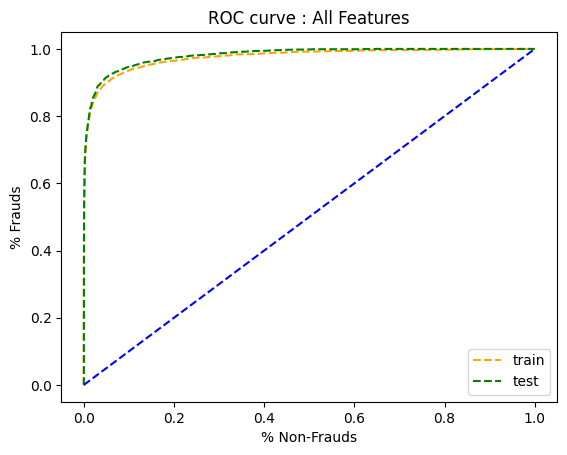

In [55]:
plotROC(y_train, score_train, y_test, score_test, model = 'All Features')

Fraud capture rate at 0.005 of Frauds in train data is : 0.7246425008313934
Fraud capture rate at 0.005 of Frauds in test data is : 0.7317415730337079


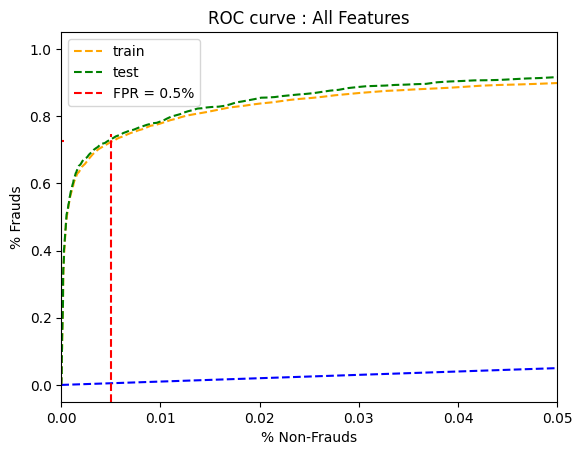

In [56]:
# target_fraud_rate can be changed
plotROC(y_train, score_train, y_test, score_test, model = 'All Features', target_fraud_rate = 0.005)

In [57]:
# import roc_auc_score
from sklearn.metrics import roc_auc_score

In [58]:
# Train data performance

auc_train = roc_auc_score(y_train, score_train)
print("AUC value of the Model on train data : ", auc_train)

lauc_train = roc_auc_score(y_train, score_train, max_fpr=0.02)
print("LAUC value of the Model on train data : ", lauc_train)

AUC value of the Model on train data :  0.9755247390141112
LAUC value of the Model on train data :  0.8738384260097164


In [59]:
# Test data performance

auc_test = roc_auc_score(y_test, score_test)
print("AUC value of the Model on test data: ", auc_test)

lauc_test = roc_auc_score(y_test, score_test, max_fpr=0.02)
print("LAUC value of the Model on test data : ", lauc_test)

AUC value of the Model on test data:  0.9815493439131154
LAUC value of the Model on test data :  0.8790199957303889


#### Performance of Card Present and Card Not Present on test data

In [60]:
# Card Present
auc_test_CP = roc_auc_score(y_test[df_test['is_CNP']==0], score_test.values[df_test['is_CNP']==0])
print("AUC value of the Model on test data for Card Present Transactions: ", auc_test_CP)

lauc_test_CP = roc_auc_score(y_test[df_test['is_CNP']==0], score_test.values[df_test['is_CNP']==0], max_fpr=0.02)
print("LAUC value of the Model on test data for Card Present Transactions: ", lauc_test_CP)

# Card not Present
auc_test_CNP = roc_auc_score(y_test[df_test['is_CNP']==1], score_test.values[df_test['is_CNP']==1])
print("AUC value of the Model on test data for Card Not Present Transactions: ", auc_test_CNP)

lauc_test_CNP = roc_auc_score(y_test[df_test['is_CNP']==1], score_test.values[df_test['is_CNP']==1], max_fpr=0.02)
print("LAUC value of the Model on test data for Card Not Present Transactions: ", lauc_test_CNP)

AUC value of the Model on test data for Card Present Transactions:  0.9750045273028412
LAUC value of the Model on test data for Card Present Transactions:  0.8536592137567421
AUC value of the Model on test data for Card Not Present Transactions:  0.991608457183451
LAUC value of the Model on test data for Card Not Present Transactions:  0.9167249879786281


#### Save the Logistic Regression Model

In [61]:
modelFile = os.path.join(path, model_folder, model + '.' + data + ".pkl")

dump(LR, open(modelFile, 'wb'))

#### Generate score on the whole dataset and output the scored out dataset

This dataset will be used as a input to perf_metrics notebook

In [62]:
# generate probability predictions on whole data
df['y_preds'] = pd.Series(LR.predict_proba(X_transform)[:,1])
# use the scoring function defined above to generate scores on whole dataset
df['score'] = scoring_predictions_logreg(X_transform, LR)
df.head()

Y pred min = 1.583514506535154e-11
Y pred max = 1.0
LogOdds min = -24.86878927490619
LogOdds max = 27.99295000764616
Score min = 1
Score max = 999


,pan,merchant,category,transactionAmount,first,last,mdlIsFraudTrx,mdlIsFraudAcct,is_train,cardholderCountry,cardholderState,transactionDateTime,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,merchCountry,merchState,deltaTime,1m,AvgTransactionAmount_Last7Days,CNP_High,HighValue_International,IS_0_TO_5AM,IsHighValue,IsSpent,IsTransaction,Is_High_Low,RelativeAmount,amount_diff,amt_trend_24h,amt_trend_5e,average_spending,category_ratio,count_trend_1h,ewm_1D,high_interaction,is_cnp,is_grocery_pos,is_international,is_late_night,is_travel,monday_buy,num_hi_amt_last_hour,num_last_24_hours,outside_country,outside_state_purchase,ratio_14D_to_60D,ratio_30D_to_60D,repeat_amt,repeat_hi_amt_1H,rolling_mean_14D,rolling_mean_30D,rolling_mean_60D,spending_above_threshold,spending_below_avg_20,transactionHour,transactionHour_Risk,user_avg_amount,is_CNP,y_preds,score
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.830000,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:12:25,F,043 Hanson Turnpike,52563,41.182600,-92.309700,1583,Geochemist,1999-06-28,362febb0060ce2d6a995a72a116e34f4,1350565945,40.289849,-92.676330,US,Missouri,0.000000,35.830000,35.830000,0,0,0,0,1,0,-1,0.000000,0.000000,35.830000,0.000000,66.400815,0.000000,1.000000,35.830000,0,1,0,0,0,False,0,0.000000,1.000000,0,1,1.000000,1.000000,0,35.830000,35.830000,35.830000,35.830000,0,1,17,0,NaN,1,0.000310,317
1,0033864050176488B,Fritsch and Sons,health_fitness,1.890000,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:47:30,F,043 Hanson Turnpike,52563,41.182600,-92.309700,1583,Geochemist,1999-06-28,de7d5f0356d41470cd02e719e2e0b196,1350568050,40.699982,-91.713680,US,Iowa,2105.000000,1.890000,18.860000,0,0,0,0,1,0,-1,0.052749,-33.940000,18.860000,0.000000,66.400815,0.000000,2.000000,18.860000,0,0,0,0,0,False,0,0.000000,2.000000,0,0,1.000000,1.000000,0,1.890000,18.860000,18.860000,18.860000,0,1,17,0,35.830000,0,0.000533,328
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.530000,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 17:59:01,F,043 Hanson Turnpike,52563,41.182600,-92.309700,1583,Geochemist,1999-06-28,c9d194a3266cd20b23478dd8d2361ef9,1350529141,40.295853,-92.779702,US,Missouri,691.000000,18.529834,18.750000,0,0,0,0,1,0,-1,0.982503,16.640000,18.750000,0.000000,66.400815,0.000000,3.000000,18.695000,1,1,0,0,0,False,0,0.000000,3.000000,0,1,1.000000,1.000000,0,18.530000,18.750000,18.750000,18.750000,0,1,17,0,18.860000,1,0.000336,319
3,0033864050176488B,Homenick LLC,personal_care,90.240000,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 18:05:38,F,043 Hanson Turnpike,52563,41.182600,-92.309700,1583,Geochemist,1999-06-28,e860a23fcbb2d46956a6f4f7b18cfe3f,1353168338,40.535509,-91.770945,US,Missouri,397.000000,90.144187,36.622500,0,0,0,0,1,1,-1,4.812800,71.710000,36.622500,0.000000,66.400815,0.000000,4.000000,54.467500,1,0,0,0,0,False,0,0.000000,4.000000,0,1,1.000000,1.000000,0,90.240000,36.622500,36.622500,36.622500,1,0,18,0,18.750000,0,0.000062,287
4,0033864050176488B,Mayert Group,shopping_pos,156.860000,Meredith,Campbell,0,0,1,US,Iowa,2020-01-01 18:08:36,F,043 Hanson Turnpike,52563,41.182600,-92.309700,1583,Geochemist,1999-06-28,d3db2da4a5c741058ff57f61023e5353,1353168516,41.245006,-92.860950,US,Iowa,178.000000,153.589793,60.670000,0,0,0,1,1,1,-1,4.283159,66.620000,60.670000,60.670000,66.400815,0.000000,5.000000,105.663750,1,0,0,0,0,False,0,1.000000,5.000000,0,0,1.000000,1.000000,0,124.373329,60.670000,60.670000,60.670000,1,0,18,0,36.622500,0,0.001362,345


In [63]:
saveColumns = [*base_cols, *feature_columns, 'y_preds', 'score']
print(f"Columns to save: {saveColumns}")

Columns to save: ['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last', 'mdlIsFraudTrx', 'mdlIsFraudAcct', 'is_train', 'cardholderCountry', 'cardholderState', 'transactionDateTime', 'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'merchCountry', 'merchState', 'deltaTime', '1m', 'AvgTransactionAmount_Last7Days', 'CNP_High', 'HighValue_International', 'IS_0_TO_5AM', 'IsHighValue', 'IsSpent', 'IsTransaction', 'Is_High_Low', 'RelativeAmount', 'amount_diff', 'amt_trend_24h', 'amt_trend_5e', 'average_spending', 'category_ratio', 'count_trend_1h', 'ewm_1D', 'high_interaction', 'is_CNP', 'is_cnp', 'is_grocery_pos', 'is_international', 'is_late_night', 'is_travel', 'monday_buy', 'num_hi_amt_last_hour', 'num_last_24_hours', 'outside_country', 'outside_state_purchase', 'ratio_14D_to_60D', 'ratio_30D_to_60D', 'repeat_amt', 'repeat_hi_amt_1H', 'rolling_mean_14D', 'rolling_mean_30D', 'rolling_mean_60D', 'spending

In [64]:
# saveCSV_train = os.path.join(path + data, 'score.' + model + '.' + train_dataset_name)
# saveCSV_test = os.path.join(path + data, 'score.' + model + '.' + test_dataset_name)

df[df['is_train']==1][saveColumns].to_csv(trainsaveCSV, index=False)
df[df['is_train']==0][saveColumns].to_csv(testsaveCSV, index=False)

### 3.2 Forward Selection of features

Forward Selection is a type of feature selection technique that starts with an empty model and adds features one by one based on a specific criterion, typically the model's performance metric. The features are added until a stop criteria is met, like maximum number of features to add or no further imporvemnet in performance.

**SequentialFeatureSelector** function from mlxtend is used to add features in Forward selection or remove features in Backward elimination (discussed in next section).

More details on SequentialFeatureSelector can be found here - https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#overview

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings("ignore")

In [66]:
## initialize logistic regression model
LR_forward = LogisticRegression(solver='liblinear', random_state=10)

<font color='red'>**This step may take upto 1 hour to run**</font>

In [67]:
# Number of features to select can be changed
num_features_to_select_forward = 10

sfs_forward = SequentialFeatureSelector(LR_forward, k_features=num_features_to_select_forward, scoring='roc_auc',forward=True, floating=False, cv=5)
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=10,
                                                       solver='liblinear'),
                          k_features=(10, 10), scoring='roc_auc')

#### Analyzing selected features
<font color='red'>**(Do not modify)**</font>

**k_feature_names_** gives list of final variables selected by SequentialFeatureSelector

In [68]:
selected_features_forward = list(sfs_forward.k_feature_names_)
print(f"Selected features: {selected_features_forward}")

Selected features: ['1m', 'AvgTransactionAmount_Last7Days', 'IS_0_TO_5AM', 'RelativeAmount', 'amount_diff', 'amt_trend_24h', 'ewm_1D', 'is_late_night', 'repeat_amt', 'rolling_mean_14D']


**get_metric_dict** provides summary of iterations

In [69]:
# Create DataFrame to store the results
results_forward = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T[['feature_idx','feature_names','avg_score']]
results_forward.rename(columns = {'avg_score':'roc'}, inplace = True)
results_forward

,feature_idx,feature_names,roc
1,"(16,)","(ewm_1D,)",0.856450
2,"(16, 31)","(ewm_1D, repeat_amt)",0.937434
3,"(4, 16, 31)","(IS_0_TO_5AM, ewm_1D, repeat_amt)",0.957575
4,"(4, 11, 16, 31)","(IS_0_TO_5AM, amt_trend_24h, ewm_1D, repeat_amt)",0.959153
5,"(1, 4, 11, 16, 31)","(AvgTransactionAmount_Last7Days, IS_0_TO_5AM, ...",0.960495
6,"(0, 1, 4, 11, 16, 31)","(1m, AvgTransactionAmount_Last7Days, IS_0_TO_5...",0.961219
7,"(0, 1, 4, 9, 11, 16, 31)","(1m, AvgTransactionAmount_Last7Days, IS_0_TO_5...",0.962542
8,"(0, 1, 4, 9, 11, 16, 22, 31)","(1m, AvgTransactionAmount_Last7Days, IS_0_TO_5...",0.964496
9,"(0, 1, 4, 9, 11, 16, 22, 31, 33)","(1m, AvgTransactionAmount_Last7Days, IS_0_TO_5...",0.964736
10,"(0, 1, 4, 9, 10, 11, 16, 22, 31, 33)","(1m, AvgTransactionAmount_Last7Days, IS_0_TO_5...",0.964963


Each row in the above dataset represents one model. The columns feature_idx and feature_names shows index numbers and names of all the features included in the model, the column roc shows the roc_auc of the model. At each step, a feature is added to the model which gives best performance.

In [70]:
# Print the selected features and the corresponding model performance
selected_features = results_forward['feature_names'].apply(lambda x: list(x))
model_performance = results_forward['roc']

list_added_features = []
for i, (features, score) in enumerate(zip(selected_features, model_performance)):
    print(f"Step {i+1}:")
    if i>0:
        added_feature = [x for x in features if x not in selected_features[i]][0]
        print(f"Added feature(s): {added_feature}")
    else:
        added_feature = features[0]
        print(f"Added feature(s): {added_feature}")
    print(f"Model performance (roc): {score}")
    print("-" * 30)
    list_added_features = list_added_features+[added_feature]

Step 1:
Added feature(s): ewm_1D
Model performance (roc): 0.8564499256911964
------------------------------
Step 2:
Added feature(s): repeat_amt
Model performance (roc): 0.9374342193308347
------------------------------
Step 3:
Added feature(s): IS_0_TO_5AM
Model performance (roc): 0.9575750355411607
------------------------------
Step 4:
Added feature(s): amt_trend_24h
Model performance (roc): 0.9591527559286483
------------------------------
Step 5:
Added feature(s): AvgTransactionAmount_Last7Days
Model performance (roc): 0.9604953844753542
------------------------------
Step 6:
Added feature(s): 1m
Model performance (roc): 0.9612190097743694
------------------------------
Step 7:
Added feature(s): RelativeAmount
Model performance (roc): 0.9625418070101365
------------------------------
Step 8:
Added feature(s): is_late_night
Model performance (roc): 0.9644963197258367
------------------------------
Step 9:
Added feature(s): rolling_mean_14D
Model performance (roc): 0.964736427088408

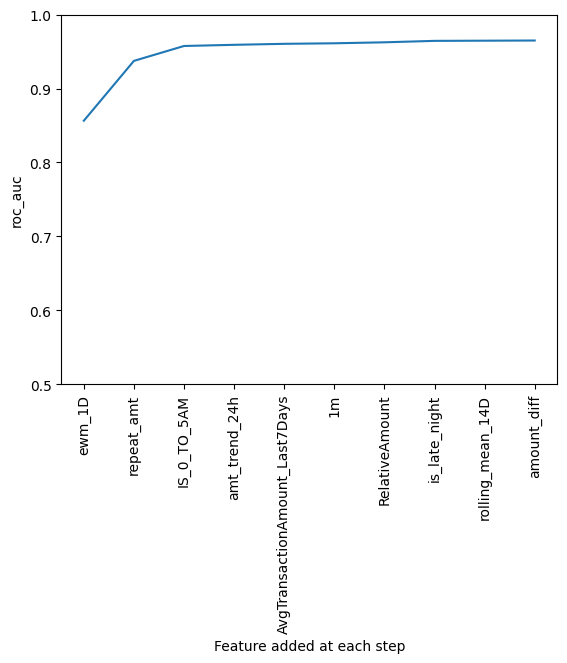

In [71]:
plt.plot(list_added_features, model_performance,label='roc_auc')
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
# x label
plt.xlabel('Feature added at each step')
# y label
plt.ylabel('roc_auc')
plt.show()

As variables are added to the model at each step, the performance of the model increases initially. The rate of performance improvement decreases with each iteration. After a certain point, no further significant improvement is observed.

#### Train a Log Reg model with selected features and evaluate the performance

In [72]:
# Creating train and test feature datasets with only the selected features from forward selection method
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]
print(X_train_forward.shape)
print(X_test_forward.shape)

(370537, 10)
(217749, 10)


In [73]:
# Train the model using selected features
LR_forward.fit(X_train_forward, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [74]:
# Feature Importance
# Fetching coefficients
feature_coefficients_forward = LR_forward.coef_[0]

# Create a DataFrame to display feature importance
feature_names_forward = X_train_forward.columns
df_importance_forward = pd.DataFrame({
    'Feature_forward': feature_names_forward,
    'Coefficients_forward': feature_coefficients_forward
}).sort_values(by='Coefficients_forward', ascending=False)

display(df_importance_forward)

,Feature_forward,Coefficients_forward
7,is_late_night,0.810371
2,IS_0_TO_5AM,0.596300
3,RelativeAmount,0.587202
5,amt_trend_24h,0.294175
1,AvgTransactionAmount_Last7Days,0.211831
8,repeat_amt,0.206314
6,ewm_1D,0.134652
4,amount_diff,-0.051855
9,rolling_mean_14D,-0.184019
0,1m,-0.360165


In [75]:
# Generate scores and evaluate performance on train dataset
score_train_forward = scoring_predictions_logreg(X_train_forward, LR_forward)
auc_train_forward = roc_auc_score(y_train, score_train_forward)
print("AUC value of Forward Inclusion Model on train data: ", auc_train_forward)

Y pred min = 3.2735225350897765e-07
Y pred max = 1.0
LogOdds min = -14.932228690634235
LogOdds max = 34.945041100449046
Score min = 1
Score max = 999
AUC value of Forward Inclusion Model on train data:  0.9652855608384524


In [76]:
# Generate scores and evaluate performance on test dataset
score_test_forward = scoring_predictions_logreg(X_test_forward, LR_forward)
auc_test_forward = roc_auc_score(y_test, score_test_forward)
print("AUC value of Forward Inclusion Model on test data: ", auc_test_forward)

Y pred min = 2.1619009361496537e-05
Y pred max = 1.0
LogOdds min = -10.741915948027266
LogOdds max = 33.09921440995071
Score min = 1
Score max = 999
AUC value of Forward Inclusion Model on test data:  0.9685651995075585


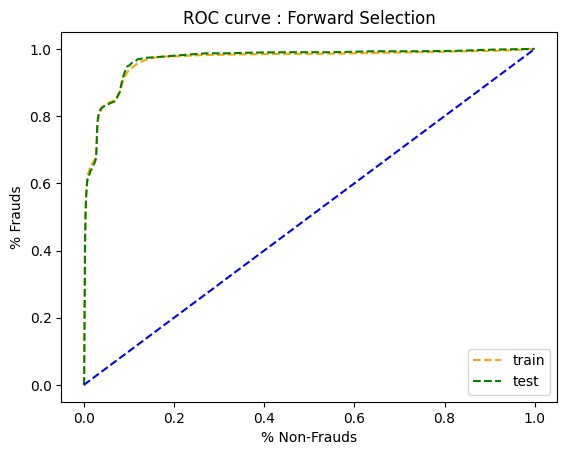

In [77]:
plotROC(y_train, score_train_forward, y_test, score_test_forward, model = 'Forward Selection')

In [78]:
# Model performance on CP and CNP
# Card Present
auc_test_CP_forward = roc_auc_score(y_test[df_test['is_CNP']==0], score_test_forward.values[df_test['is_CNP']==0])
print("AUC value of the Forward Inclusion Model on test data for Card Present Transactions: ", auc_test_CP_forward)

# Card not Present
auc_test_CNP_forward = roc_auc_score(y_test[df_test['is_CNP']==1], score_test_forward.values[df_test['is_CNP']==1])
print("AUC value of the Forward Inclusion Model on test data for Card Not Present Transactions: ", auc_test_CNP_forward)

AUC value of the Forward Inclusion Model on test data for Card Present Transactions:  0.9595400034661175
AUC value of the Forward Inclusion Model on test data for Card Not Present Transactions:  0.9823690531689859


### 3.3 Backward Elimination of features

Backward Elimination is a feature selection method that starts with a model with all the variables and removes the least significant features one by one until a stopping criteria is met.

In [79]:
## initialize logistic regression model
LR_backward = LogisticRegression(solver='liblinear', random_state=10)

<font color='red'>**This step may take upto 1 hour to run**</font>

In [ ]:
# Number of features to select can be changed
num_features_to_select_backward = 10

sfs_backward = SequentialFeatureSelector(LR_backward, k_features=num_features_to_select_backward, scoring='roc_auc',forward=False, floating=False, cv=5)
sfs_backward.fit(X_train, y_train)

#### Analyzing selected features
<font color='red'>**(Do not modify)**</font>

In [ ]:
selected_features_backward = list(sfs_backward.k_feature_names_)
print(f"Selected features: {selected_features_backward}")

In [ ]:
# Create DataFrame to store the results
results_backward = pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T[['feature_idx','feature_names','avg_score']]
results_backward.rename(columns = {'avg_score':'roc'}, inplace = True)
results_backward

Each row in the above dataset represents one model. The columns feature_idx and feature_names shows index numbers and names of all the features included in the model, the column roc shows the roc_auc of the model. At each step, a feature is removed from the model which least affects the performance.

In [ ]:
# Print the selected features and the corresponding model performance
selected_features = results_backward['feature_names'].apply(lambda x: list(x))
model_performance = results_backward['roc']

list_removed_features = []
for i, (features, score) in enumerate(zip(selected_features, model_performance)):
    print(f"Step {i+1}:")
    if i>0:
        removed_feature = [x for x in selected_features[X_train.shape[1]+1-i] if x not in features][0]
        print(f"Removed feature(s): {removed_feature}")
    else:
        removed_feature = 'NA'
        print(f"Removed feature(s): {removed_feature}")
    print(f"Model performance (roc): {score}")
    print("-" * 30)
    list_removed_features = list_removed_features+[removed_feature]

In [ ]:
plt.plot(list_removed_features, model_performance,label='roc_auc')
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
# x label
plt.xlabel('Feature removed at each step')
# y label
plt.ylabel('roc_auc')
plt.show()

As the features are removed at each step, the performance remains almost same initially. As more features are removed, roc starts to decrease slightly. If more features are removed, we can observe that the performance decresases at each step.

#### Train a Log Reg model with selected features and evaluate on test dataset

In [ ]:
# Creating train and test feature datasets with only the selected features from backward elimination method
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]
print(X_train_backward.shape)
print(X_test_backward.shape)

In [ ]:
# train the model using selected features
LR_backward.fit(X_train_backward, y_train)

In [ ]:
# Feature Importance
# Fetching coefficients
feature_coefficients_backward = LR_backward.coef_[0]

# Create a DataFrame to display feature importance
feature_names_backward = X_train_backward.columns
df_importance_backward = pd.DataFrame({
    'Feature_backward': feature_names_backward,
    'Coefficients_backward': feature_coefficients_backward
}).sort_values(by='Coefficients_backward', ascending=False)

display(df_importance_backward)

In [ ]:
# Make predictions and evaluate performance on test dataset
score_train_backward = scoring_predictions_logreg(X_train_backward, LR_backward)
auc_train_backward = roc_auc_score(y_train, score_train_backward)
print("AUC value of Backward Elimination Model on train data: ", auc_train_backward)

In [ ]:
# Make predictions and evaluate performance on test dataset
score_test_backward = scoring_predictions_logreg(X_test_backward, LR_backward)
auc_test_backward = roc_auc_score(y_test, score_test_backward)
print("AUC value of Backward Elimination Model on test data: ", auc_test_backward)

In [ ]:
plotROC(y_train, score_train_backward, y_test, score_test_backward, model = 'Backward Elimination')

In [ ]:
# Model performance on CP and CNP
# Card Present
auc_test_CP_backward = roc_auc_score(y_test[df_test['is_CNP']==0], score_test_backward.values[df_test['is_CNP']==0])
print("AUC value of the Backward Elimination Model on test data for Card Present Transactions: ", auc_test_CP_backward)

# Card not Present
auc_test_CNP_backward = roc_auc_score(y_test[df_test['is_CNP']==1], score_test_backward.values[df_test['is_CNP']==1])
print("AUC value of the Backward Elimination Model on test data for Card Not Present Transactions: ", auc_test_CNP_backward)

### Exercise

- Train log reg model on new features (at least 10 variables)
- Identify important features
- Calculate AUC values for train, test, CP and CNP
- Prepare Midpoint Report